In [ ]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_inceptionV3(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.applications.inception_v3.InceptionV3(
                weights="imagenet", include_top=False, input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(
                preprocessing_utils.num_classes, kernel_regularizer=keras.regularizers.l2(0.01), activation="softmax"
            ),
        ],
    )

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
inceptionV3_wrapper = ModelWrapper("InceptionV3", preprocessing_utils=preprocessing_utils)

In [8]:
inceptionV3_wrapper.build_model(build_fn=build_inceptionV3, model_name=inceptionV3_wrapper.model_name)

Building model...
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 22,068,281
Trainable params: 22,033,849
Non-trainable params: 34,432
____________________

In [9]:
inceptionV3_wrapper.train_evaluate_and_save_model(
    batch_size=32,
    callbacks=[keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)],  # type: ignore
)

Epoch 1/100
129/129 [==============================] - 16s 79ms/step - loss: 3.4752 - accuracy: 0.0521 - val_loss: 3.3945 - val_accuracy: 0.0691 - lr: 1.0000e-04
Epoch 2/100
129/129 [==============================] - 9s 69ms/step - loss: 3.2785 - accuracy: 0.1260 - val_loss: 3.2808 - val_accuracy: 0.1336 - lr: 1.0000e-04
Epoch 3/100
129/129 [==============================] - 9s 69ms/step - loss: 3.1318 - accuracy: 0.1892 - val_loss: 3.1748 - val_accuracy: 0.1843 - lr: 1.0000e-04
Epoch 4/100
129/129 [==============================] - 9s 69ms/step - loss: 2.9845 - accuracy: 0.2496 - val_loss: 3.0530 - val_accuracy: 0.2166 - lr: 1.0000e-04
Epoch 5/100
129/129 [==============================] - 9s 69ms/step - loss: 2.8237 - accuracy: 0.3087 - val_loss: 2.9183 - val_accuracy: 0.2442 - lr: 1.0000e-04
Epoch 6/100
129/129 [==============================] - 9s 69ms/step - loss: 2.6602 - accuracy: 0.3605 - val_loss: 2.7782 - val_accuracy: 0.2995 - lr: 1.0000e-04
Epoch 7/100
129/129 [============

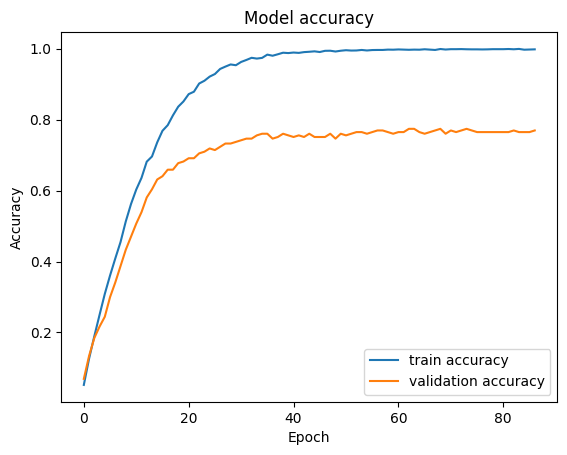

In [10]:
inceptionV3_wrapper.plot_accuracy()

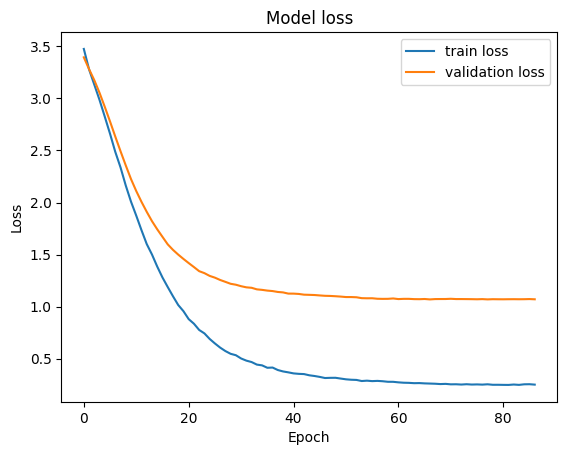

In [11]:
inceptionV3_wrapper.plot_loss()

20/20 [==============================] - 1s 21ms/step


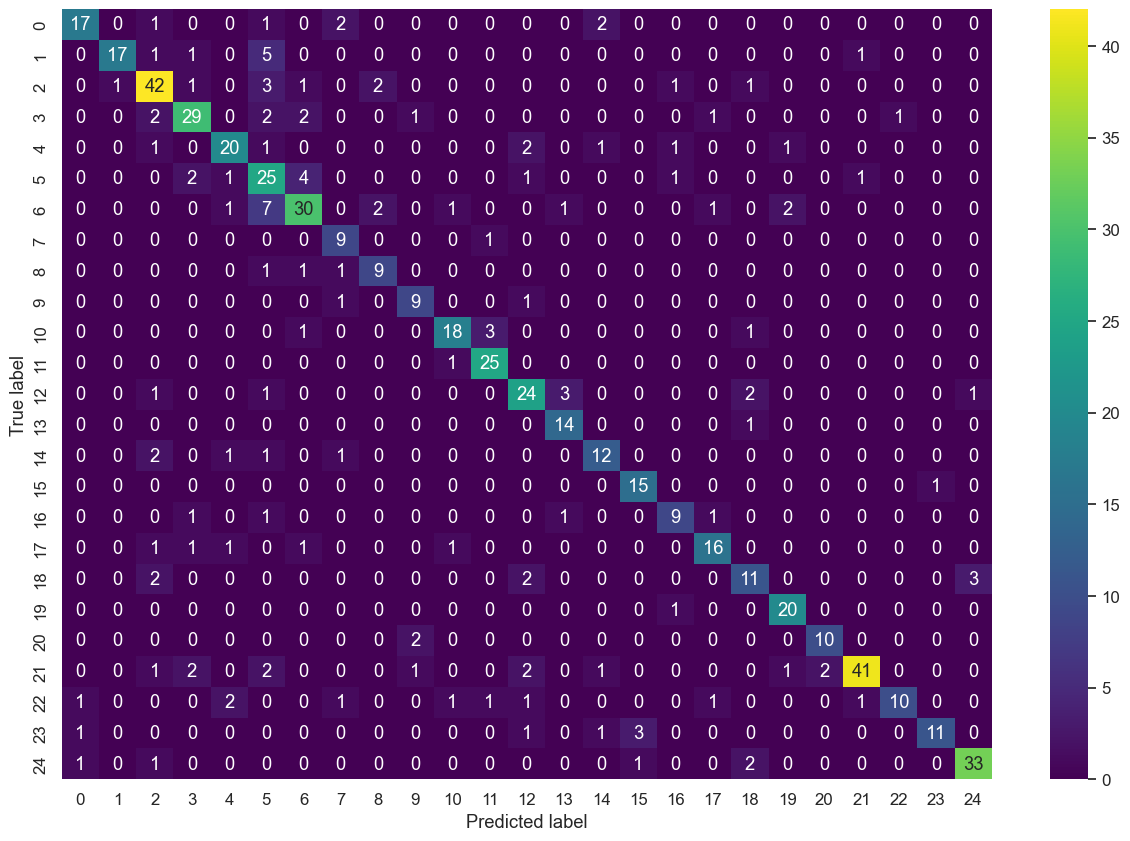

In [12]:
inceptionV3_wrapper.display_confusion_matrix()